In [44]:
from qutip import *
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint

plt.rcParams.update({'font.size': 14})
np.set_printoptions(threshold=np.inf)

In [45]:
sz=jmat(1,'z')
sx=jmat(1,'x')
sp=jmat(1,'+')
sm=jmat(1,'-')

In [46]:
def hamil(N,omega,delta):
    sum1=np.zeros((3,3))
    sum2=np.zeros((3,3))
    sum1=Qobj(sum1)
    sum2=Qobj(sum2)
    s1=[]
    s2=[]
    for i in range(N):
        s1.append(sum1)
        s2.append(sum2)
    sum1=tensor(s1)
    sum2=tensor(s2)
    I=identity(3)
    I_list=[]
    
    sz_list=[]
    for i in range(N):
        I_list=[]
        for n in range(N):
            I_list.append(I)
        I_list[i]=sz
        sz_list.append(tensor(I_list))
    spm_list=[]
    smp_list=[]
    szz_list=[]
    for i in range(N-1):
        I_list=[]
        for n in range(N):
            I_list.append(I)
        I_list[i]=sp
        I_list[i+1]=sm
        spm_list.append(tensor(I_list))
        I_list[i]=sm
        I_list[i+1]=sp
        smp_list.append(tensor(I_list))
        I_list[i]=sz
        I_list[i+1]=sz
        szz_list.append(tensor(I_list))
    for i in range(N):
        sum1+=omega[i]*sz_list[i]
    for i in range(N-1):
        sum2+=spm_list[i]+smp_list[i]+delta*szz_list[i]
    return sum1+sum2

In [47]:
def louivil(H,N,L,gamma):
    sum1=np.zeros((3,3))
    sum2=np.zeros((3,3))
    sum1=Qobj(sum1)
    sum2=Qobj(sum2)
    s1=[]
    s2=[]
    for i in range(2*N):
        s1.append(sum1)
        s2.append(sum2)
    sum1=tensor(s1)
    sum2=tensor(s2)
    I=identity(3)
    I_list=[]
    for n in range(N):
        I_list.append(I)
    I=tensor(I_list)
    sum1=-1j*(tensor(H,I)-tensor(I,H.trans()))
    l_list=[]
    for i in range(N):
        I_list=[]
        for n in range(N):
            I_list.append(I)
        I_list[i]=L
        l_list.append(tensor(I_list))
    I=identity(3)
    l_list=[]
    lc_list=[]
    lh_list=[]
    for i in range(N):
        I_list=[]
        for n in range(N):
            I_list.append(I)
        I_list[i]=L
        l_list.append(tensor(I_list))
        I_list[i]=L.conj()
        lc_list.append(tensor(I_list))
        I_list[i]=L.dag()
        lh_list.append(tensor(I_list))
    I_list=[]
    for n in range(N):
        I_list.append(I)
    I=tensor(I_list)
    for i in range(N):
        sum2+=gamma*(tensor(l_list[i],lc_list[i]))
        sum2+=-0.5*(tensor((lh_list[i]*l_list[i]),I))
        sum2+=0.5*(tensor(I,(lh_list[i]*l_list[i]).trans()))
    return sum1+sum2
    

In [89]:
N=2
delta=0.5
omega=np.ones(N)
#omega=randint(0.1,5,N)
H=hamil(N,omega,delta)
H

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[ 2.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   1.   0.   2.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.5  0.   2.   0.   0.   0.   0. ]
 [ 0.   2.   0.   1.   0.   0.   0.   0.   0. ]
 [ 0.   0.   2.   0.   0.   0.   2.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -1.   0.   2.   0. ]
 [ 0.   0.   0.   0.   2.   0.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   2.   0.  -1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -1.5]]

In [90]:
L=sz**2
#louivil(H,N,L,gamma)

In [91]:
H.isherm

True

In [92]:
def corr(f,g,times):
    k=0
    corr=[]
    times_new=[]
    for i in range(100):
        corr.append(np.corrcoef(f[k:k+10],g[k:k+10])[1,0])
        times_new.append(times[k])
        k+=10
    return corr,times_new



    

In [93]:
times = np.linspace(0.0, 100.0, 1000)
dim=[]
for i in range(N):
    dim.append(3)
#psi0=rand_dm(3**N,0.5,dims=[dim, dim])
psi0=rand_dm_ginibre(3**N,dims=[dim, dim],rank=1)
gamma=1.0
I=identity(3)
sz2_list=[]
sx2_list=[]
for i in range(N):
    I_list=[]
    for n in range(N):
        I_list.append(I)
    I_list[i]=np.sqrt(gamma)*sz**2
    sz2_list.append(tensor(I_list))
    I_list[i]=sx**2
    sx2_list.append(tensor(I_list))
    

result1 = mesolve(H, psi0, times, sz2_list,sx2_list)
psi0

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[ 0.11858197+6.95307511e-19j -0.05551612-7.19597591e-02j
  -0.10493602+5.73714981e-02j -0.14398933-3.35707336e-03j
  -0.10903144+8.67973658e-02j -0.03480803-7.53410198e-03j
  -0.08174241-6.02110749e-02j -0.11041918-1.19017067e-01j
   0.0620709 -2.31031799e-03j]
 [-0.05551612+7.19597591e-02j  0.06965854+5.67396928e-19j
   0.01431248-9.05383338e-02j  0.06944819-8.58061794e-02j
  -0.00162685-1.06799788e-01j  0.02086792-1.75955352e-02j
   0.07480729-2.14153865e-02j  0.12391837-1.12864681e-02j
  -0.02765754+3.87484428e-02j]
 [-0.10493602-5.73714981e-02j  0.01431248+9.05383338e-02j
   0.12061747-5.04096839e-18j  0.1257954 +7.26346635e-02j
   0.13847822-2.40582385e-02j  0.02715736+2.35076837e-02j
   0.04320491+9.28302608e-02j  0.04013057+1.58743285e-01j
  -0.05604578-2.79862509e-02j]
 [-0.14398933+3.35707336e-03j  0.06944819+8.58061794e-02j
   0.1257954 -7.26346635e-02j  0.1749355 -6.37873357e-19j

In [94]:
lo=liouvillian(H, c_ops=sz2_list)
lo

Quantum object: dims = [[[3, 3], [3, 3]], [[3, 3], [3, 3]]], shape = (81, 81), type = super, isherm = False
Qobj data =
[[ 0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
   0. +0.j   0. +0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j  -0.5+1.5j  0. +0.j   0. -2.j   0. +0.j   0. 

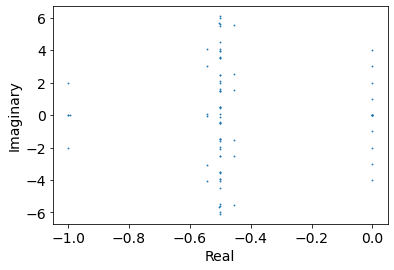

In [95]:
el=lo.eigenenergies()
#ev=lo.eigenstates()
x = [ele.real for ele in el]
y = [ele.imag for ele in el]

plt.scatter(x, y,s=0.7)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

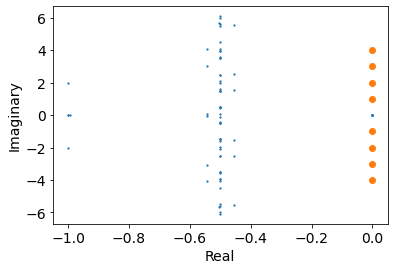

In [111]:
img_ev=[]
img_vect=[]

for i in range(len(el)):
    if (el[i].real< 1.0e-13) and (el[i].real > -1.0e-13)  :
        
        img_ev.append(el[i])
        #img_vect.append(ev[i])
    elif el[i].real==0:
        img_ev.append(el[i])
        img_vect.append(ev[i])
img_ev1=[]
img_vect1=[]

for i in range(len(img_ev)):
    #if (mt.trunc(img_ev[i].imag)!=0):
    if (abs(img_ev[i].imag)>pow(10,-15)):
        
        
        
        img_ev1.append(img_ev[i]) 
        #img_vect1.append(img_vect[i])
x = [ele.real for ele in el]
y = [ele.imag for ele in el]
x1 = [ele.real for ele in img_ev1]
y1 = [ele.imag for ele in img_ev1]
plt.scatter(x, y,s=1.5)
plt.scatter(x1, y1)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.savefig('imgevlsN=2.png')
plt.show()

In [112]:
psi0s=psi0*psi0
psi0s.tr()

1.0

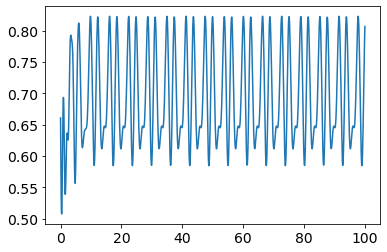

In [113]:
plt.plot(times,result1.expect[0])
plt.show()

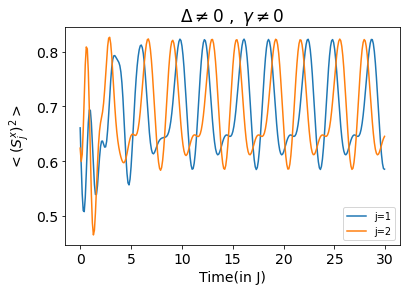

In [115]:
plt.plot(times[0:300],result1.expect[0][0:300],label='j=1')
plt.plot(times[0:300],result1.expect[1][0:300],label='j=2')
#plt.plot(times[0:400],result1.expect[2][0:400],label='j=3')
#plt.plot(times[0:200],result1.expect[3][0:200],label='j=4')
#plt.plot(times[0:400],result1.expect[4][0:400],label='j=5')
plt.xlabel('Time(in J)')
plt.ylabel(r'$<(S^x_j)^2>$')
plt.title(r'$\Delta\neq 0$ $,$ $\gamma\neq0$')
plt.legend(loc='best',fontsize='x-small')
plt.savefig('n=2A.png',bbox_inches="tight")
plt.show()

In [74]:
corr12,t=corr(result1.expect[0],result1.expect[1],times)
corr13,t=corr(result1.expect[0],result1.expect[2],times)
corr23,t=corr(result1.expect[1],result1.expect[2],times)

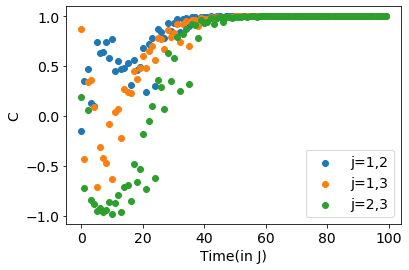

In [75]:
plt.scatter(t,corr12,label='j=1,2')
plt.scatter(t,corr13,label='j=1,3')
plt.scatter(t,corr23,label='j=2,3')
plt.xlabel('Time(in J)')
plt.ylabel(r'C')
plt.legend()
plt.show()

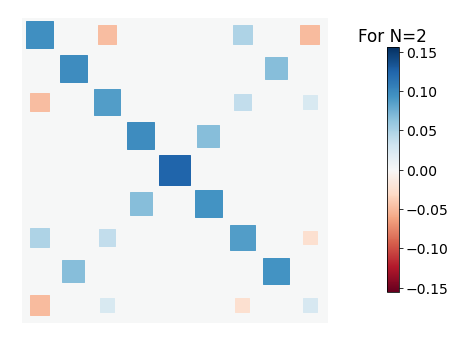

In [116]:
density=[]
result_dm = mesolve(H, psi0, times, sz2_list)
density=result_dm.states
density[999]
abs(density[999])
fig, ax = hinton(density[999],xlabels=False,ylabels=False)

plt.title('For N=2')
plt.savefig('ssdmn2.png',bbox_inches="tight")

In [117]:
a=[]
b=[]
#c=[]
for i in range(len(times)):
    a.append(density[i].ptrace(0))
    b.append(density[i].ptrace(1))
    #c.append(density[i].ptrace(2))

In [118]:
f12=[]
#f23=[]
#f13=[]
for i in range(len(times)):
    f12.append(fidelity(a[i],b[i]))
    #f23.append(fidelity(b[i],c[i]))
    #f13.append(fidelity(a[i],c[i]))


In [21]:
#f12[0],f13[0],f23[0]

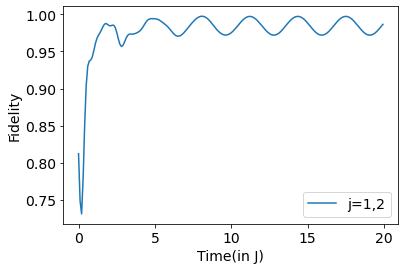

In [120]:
plt.plot(times[0:200],f12[0:200],label='j=1,2')
#plt.plot(times[0:200],f23[0:200],label='j=2,3')
#plt.plot(times[0:200],f13[0:200],label='j=1,3')
plt.xlabel('Time(in J)')
plt.ylabel(r'Fidelity')
#plt.ylim(0.99991,)
#plt.title(r'$\Delta\neq 0$ $,$ $\gamma\neq0$')
plt.legend()
plt.savefig('n=2fid.png',bbox_inches="tight")
plt.show()

In [32]:
psi = tensor(basis(2, 0), basis(2, 1))
psi*psi.dag()

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

In [33]:
a=psi.ptrace(0)
b=psi.ptrace(1)
re=tensor(a,b)
re

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

In [78]:
delta=0
H2=hamil(N,omega,delta)
result2 = mesolve(H2, psi0, times, sz2_list,sx2_list)


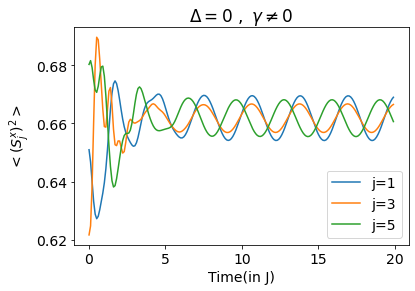

In [79]:
plt.plot(times[0:200],result2.expect[0][0:200],label='j=1')
#plt.plot(times[0:200],result2.expect[1][0:200],label='j=2')
plt.plot(times[0:200],result2.expect[2][0:200],label='j=3')
#plt.plot(times,result2.expect[3],label='j=4')
plt.plot(times[0:200],result2.expect[4][0:200],label='j=5')
plt.xlabel('Time(in J)')
plt.ylabel(r'$<(S^x_j)^2>$')
plt.title(r'$\Delta=0$ $,$ $\gamma\neq0$')
plt.legend()
plt.savefig('n=5B.png',bbox_inches="tight")
plt.show()

In [40]:
corr12,t=corr(result2.expect[0],result2.expect[1],times)
corr13,t=corr(result2.expect[0],result2.expect[2],times)
corr23,t=corr(result2.expect[1],result2.expect[2],times)

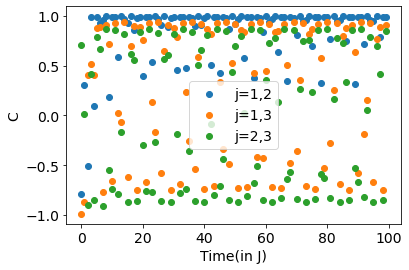

In [41]:
plt.scatter(t,corr12,label='j=1,2')
plt.scatter(t,corr13,label='j=1,3')
plt.scatter(t,corr23,label='j=2,3')
plt.xlabel('Time(in J)')
plt.ylabel(r'C')
plt.legend()
plt.show()

In [42]:
gamma=0.0
I=identity(3)
sz2_list=[]
sx2_list=[]
for i in range(N):
    I_list=[]
    for n in range(N):
        I_list.append(I)
    I_list[i]=np.sqrt(gamma)*sz**2
    sz2_list.append(tensor(I_list))
    I_list[i]=sx**2
    sx2_list.append(tensor(I_list))
result3 = mesolve(H, psi0, times, sz2_list,sx2_list)


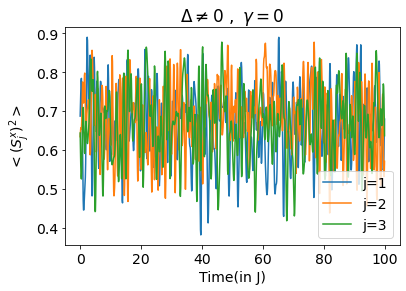

In [43]:
plt.plot(times,result3.expect[0],label='j=1')
plt.plot(times,result3.expect[1],label='j=2')
plt.plot(times,result3.expect[2],label='j=3')
#plt.plot(times,result3.expect[3],label='j=4')
#plt.plot(times,result3.expect[4],label='j=5')
plt.xlabel('Time(in J)')
plt.ylabel(r'$<(S^x_j)^2>$')
plt.title(r'$\Delta\neq0$ $,$ $\gamma=0$')
plt.legend()
#plt.savefig('n=3c.png',bbox_inches="tight")
plt.show()

In [31]:
corr12,t=corr(result3.expect[0],result3.expect[1],times)
corr13,t=corr(result3.expect[0],result3.expect[2],times)
corr23,t=corr(result3.expect[1],result3.expect[2],times)

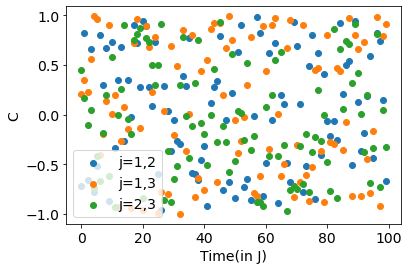

In [32]:
plt.scatter(t,corr12,label='j=1,2')
plt.scatter(t,corr13,label='j=1,3')
plt.scatter(t,corr23,label='j=2,3')
plt.xlabel('Time(in J)')
plt.ylabel(r'C')
plt.legend()
plt.show()

In [33]:
omegabar=1.0
delomega=-0.075
gamma=2.0
delta=0.5


In [34]:
omega=[omegabar-delomega,omegabar,omegabar+delomega]
#For N=3

In [35]:
H=hamil(N,omega,delta)
H

Quantum object: dims = [[3, 3, 3], [3, 3, 3]], shape = (27, 27), type = oper, isherm = True
Qobj data =
[[ 4.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     2.575  0.     2.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     1.15   0.     2.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     2.     0.     2.     0.     0.     0.     0.     0.     2.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     2.     0.     1.075  0.     2.     0.     0.     0.
   2.     0.     0.     0.     0.     0.     0.     0.     0.     0

In [36]:
up=basis(3,0)
a = destroy(3)
zero=a.dag()*up
down=a.dag()*zero
down=down/mt.sqrt(2)
right=(up+down).unit()
state=tensor(right,zero,zero)
psi0=state*state.dag()
psi0

Quantum object: dims = [[3, 3, 3], [3, 3, 3]], shape = (27, 27), type = oper, isherm = True
Qobj data =
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


In [37]:
times = np.linspace(0.0, 50.0, 1000)
dim=[]
#for i in range(N):
#    dim.append(3)
#psi0=rand_dm(3**N,0.5,dims=[dim, dim])
I=identity(3)
sz2_list=[]
sx2_list=[]
for i in range(N):
    I_list=[]
    for n in range(N):
        I_list.append(I)
    I_list[i]=np.sqrt(gamma)*sz**2
    sz2_list.append(tensor(I_list))
    I_list[i]=sx**2
    sx2_list.append(tensor(I_list))
    

result4 = mesolve(H, psi0, times, sz2_list,sx2_list)
result4

Result object with mesolve data.
--------------------------------
expect = True
num_expect = 3, num_collapse = 3

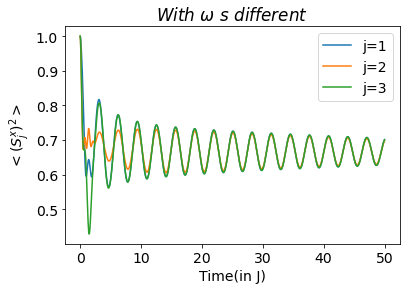

In [38]:
plt.plot(times,result4.expect[0],label='j=1')
plt.plot(times,result4.expect[1],label='j=2')
plt.plot(times,result4.expect[2],label='j=3')
#plt.plot(times,result1.expect[3],label='j=4')
#plt.plot(times,result1.expect[4],label='j=5')
plt.xlabel('Time(in J)')
plt.ylabel(r'$<(S^x_j)^2>$')
plt.title(r'$With$ $\omega$ $s$ $different$')
plt.legend()
#plt.savefig('n=5A.png',bbox_inches="tight")
plt.show()

In [39]:
corr12,t=corr(result4.expect[0],result4.expect[1],times)
corr13,t=corr(result4.expect[0],result4.expect[2],times)
corr23,t=corr(result4.expect[1],result4.expect[2],times)

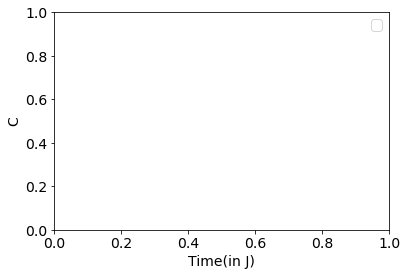

In [40]:
# plt.plot(t,corr12,label='j=1,2')
#plt.scatter(t,corr13,label='j=1,3')
#plt.scatter(t,corr23,label='j=2,3')
plt.xlabel('Time(in J)')
plt.ylabel(r'C')
plt.legend()
plt.show()